$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Maximum likelihood estimation (MLE), Maximum a posteriori (MAP)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 16/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Maximum likelihood estimator (MLE), 4 points]

Consider a dataset $x_1, \ldots, x_n$ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p$ identity matrix, and $\sigma^2$ is a
scalar. Derive the maximum likelihood estimator for $\sigma$.

## [Posterior distributions, 6 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. 
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

1. Derive the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$. (HINT: inverse-gamma distribution is conjugate prior to sphericalGaussian distribution when mean is known).

2. Assume $\mu$ is known and consider two separate models (having different parameters)

    * $\alpha =1$ and $\beta=1$ (Model $M_{A}$)
    * $\alpha = 10$ and $\beta= 1$ (Model $M_{B}$) 

Compute analytically the expression for the MAP estimate for both models in terms of posterior parameters referred to as $\alpha_{1}, \beta_{1}$.

# Solutions to the theoretical problems

## Maximum Likelihood estimator
We wish to calculate $\sigma_{MLE}$ for the given distribution. To do this we take the likelihood function and derivate with regards to $\sigma$, set to zero and solve. 

We thus have

$ P(x | \mu) = \frac{1}{2\Pi\sigma^2} exp(\frac{-1}{2\Pi\sigma^2 n }\sum_{i=1}^{n} (x_i - \mu)^T(x_i- \mu)) $

To simplyfy things we take the log-likelihood function and derive with regards to $\sigma$, set to zero and solve.

$log(P(x | \mu)) = log(\frac{1}{2\Pi\sigma^2}) - \frac{1}{2\Pi\sigma^2 n}\sum_{i=1}^{n} (x_i - \mu)^T (x_i - \mu)))$

$\frac{dP(x | \mu)}{d\sigma} = \frac{-2}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^{n} (x_i - \mu)^2 = 0 => \sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \mu)^T(x_i - \mu)}{n}$

And we thus get the MLE estimator for $\sigma$

$\sigma_{MLE} = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu)}{n}}$

## Posterior distributions
Calculate the likleyhood for the spherical gaussian distribution. Multiply with the prior to get the posterior distribution.

### Subtask1
We wish to compute the posterior $P(\sigma | x)$, to do this we can use bayes theorem which states $\frac{p(x|\sigma)p(\sigma)}{\int_{a}p(x|\sigma)p(\theta)d\theta}$. In the event of the prior being a conjugaste prior, the posterior can be derived by $P(\sigma^2 | x) \propto \frac{P(x | \sigma^2)*P(\sigma)}{z'}$ Where $z'$ is a normalizing factor and $P(\sigma)$ is the likelyhood function. 

We have the likleyhood function. Since the prior is a conjugate prior, the posterior will follow the same form as the prior, i.e. become a inverse-gamma distibution. 

We thus get 
$P(\sigma^2 = s|x_1,...,x_n,\alpha_1,\beta_1) = \frac{\beta_1^\alpha}{\Gamma(\alpha_1)}* s^{\alpha_0 - 1}exp(\frac{-\beta_1}{s})*  \frac{1}{2\pi\sigma^2}exp(\sum_{i=1}^{n}-\frac{(x_i-\mu)^T(x_i-\mu)}{2\sigma^2})$

We group terms together and get 

$\frac{\beta_0^{\alpha_0}}{\Gamma(\alpha_0)2 \pi s}s^{-\alpha-1}exp(\frac{-1}{s}(\beta +\frac{(x_i - \mu)^T(x_i-\mu))}{2})$ Which is a inverse gamma function with parameters $\alpha+1$ and $\beta + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu)$ i.e. $P(\sigma^2 = s_{1}|x_1,...,x_n,\alpha_1,\beta_1$ ~ $InvGamma(\alpha+1,\beta + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu))$ 


### Subtask 2
The MAP estimation is the mode of the posterior distribution, the mode of inverse gamma distribution is: 
$\frac{\beta}{\alpha + 1}$ 

For **$M_{A}$** we get

$\beta_{1} = \beta_{0} + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu)) = 1 + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu))$

$\alpha_{1} = \alpha_{0} + 1 = 1 + 1 = 2$

put this into mode and get:

$\sigma_{MLE} = \frac{1 + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu))}{3}$


For **$M_{B}$** we get

$\beta_{1} = \beta_{0} + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu)) = 1 + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu))$

$\alpha_{1} = \alpha_{0} + 1 = 10 + 1 = 11$

put this into mode and get:

$\sigma_{MLE} = \frac{1 + \frac{1}{2}\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu))}{11}$





##### Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot,
  grid, title etc.

## [Spherical Gaussian estimation, 5 points]

Consider a dataset consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the MLE estimators for $\mu$ and $\sigma$ in above setup. (HINT: Use latex equations here, or mention in pdf. This [link](http://data-blog.udacity.com/posts/2016/10/latex-primer/) might be useful if you choose to write here).

(b) Implement a function **sge()** that estimates the mean $\mu$ and variance $\sigma^{2}$ from the given data, using the skeleton code provided below. Note: You cannot use **numpy.cov** and **numpy.mean** or any other functions for calculating the mean and variance.

(c) Implement a function **myplot1()** which takes as input a two-dimensional dataset $x$ (as described above); and draws, on the same plot, the following:
1. A scatter plot of the original data $x$, 
2. Circles with center $\mu$ and radius $r=k \sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma^{2}$ denote the mean and variance estimated using **sge()**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load 'dataset0.txt' and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

## Spherical Gaussian estimation Solutions
To get the solutions we derivate with regards to the parameters, set to zero and compute the MLE estimate. The equations are as follows:

$\mu_{MLE} = \frac{1}{n}\sum_{i=1}^{n} x_i$

$\sigma_{MLE} = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^T(x_i-\mu)}{n}}$

a) Teoretiskt lite samma som Posterior subT 2
b) sge, använda det vi gör i a, ev. kika på källkod till numpy.mean osv. 
c) på samma plot rita scatter (scatter funktion), använda mycket från förra veckan. 1. Rita ut alla punkter 2 rita ut cirklar 3 skriva antal utanför varje cirkel vid cirkel (använd legend funlktion)

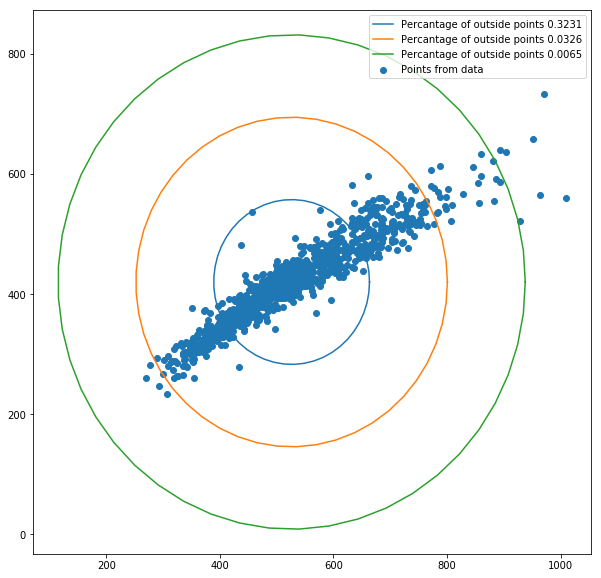

In [142]:
import numpy as np
import matplotlib.pyplot as plt
def sge(X):
    mu = 0
    sigma = 0
    
    # Sum all points together and divide by number of points to get the mean
    for i in X: 
        mu += np.divide(i,len(X))
    
    # Normalize the data, i.e. subtract the mean
    normalized = np.subtract(X,mu)
    # Calculate sigma by dot product and division by number of points
    for i in normalized:
        sigma += i.dot(i.T)
    sigma = np.sqrt(sigma/len(X))
    return mu,sigma



def myplot1(X):
    mu, sigma = sge(X)
    # Set figure size 
    plt.figure(figsize=(10,10))
    # Draw scatter plot 
    plt.scatter(X[:,0],X[:,1])
    # Empty legend
    legend =[]

    # Draw all four circles
    for i in range(1,4):
        circleRadius = i * sigma
        linespacing = np.linspace(0,2*np.pi)
        plt.plot(mu[0] + i*sigma*np.cos(linespacing), mu[1] + i*sigma*np.sin(linespacing))
        
        pointsOutside = np.sum(np.linalg.norm(X-mu,axis=1) > circleRadius) / len(X)
        legend.append("Percantage of outside points %.4f" % (pointsOutside))
    
    legend.append("Points from data")
    plt.legend(legend)
    
    
# Load
loadData = np.loadtxt('dataset0.txt')
points = loadData[:,:2]
myplot1(points)


## [MAP estimation, 5 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a multivariate normal distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. We will now explore the Bayesian approach to estimation of $\sigma^{2}$ *under the assumption that the mean $\mu$ is known.*
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

Assume that your dataset now consists of just the first two features of 'dataset0.txt'.

(a) Choose $\mu$ to be the empirical mean. Implement a function **myplot2()**, that on the same plot, shows the prior and posterior distributions for $\sigma$ with parameters $\alpha = 1 $ and $\beta = 1$.  Generate a second plot with $\alpha=10$ and $\beta=1$. What do you observe?

HINT:
   * Calculate the posterior distribution using the data and the formula that you derived in the theoretical question **"Posterior distributions"**.
   * You might want to check out the "log-sum-exp trick".

In [ ]:
1. Beräkna mean. 
2. Beräkna posterior och prior på datan
3. Plotta med givna parametrae
4. Gör samma med de andra parametrarna